In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def DetectOutlier(df,var):
 # IQR method is used to deal with outliers
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR

 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 # new dataframe is created which contains outliers
 df1 = df[((df[var] < low) | (df[var] > high))] #these are outliers
 print('Outliers : \n', len(df1))
 print(df1.T)
 df = df[((df[var] >= low) & (df[var] <= high))] #now filter out data which is not outlier
 return(df)

In [6]:
df = pd.read_csv('academic.csv')

In [7]:
# Display basic information
print('Information of Dataset:\n', df.info)
print('Shape of Dataset (row x column): ', df.shape)
print('Columns Name: ', df.columns)
print('Total elements in dataset:', df.size)
print('Datatype of attributes (columns):', df.dtypes)
print('First 5 rows:\n', df.head().T)
print('Last 5 rows:\n',df.tail().T)
print('Any 5 rows:\n',df.sample(5).T)
#---------------------------------------------------------------------------------------
# Display Statistical information
print('Statistical information of Numerical Columns: \n',df.describe())
#---------------------------------------------------------------------------------------
# Display Null values
print('Total Number of Null Values in Dataset: \n', df.isna().sum())
#---------------------------------------------------------------------------------------
# Fill the missing values
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)
print('Total Number of Null Values in Dataset: \n', df.isna().sum())
#---------------------------------------------------------------------------------------
# Converting categorical to numeric using Find and replace method
df['Relation']=df['Relation'].astype('category')
df['Relation']=df['Relation'].cat.codes

Information of Dataset:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F

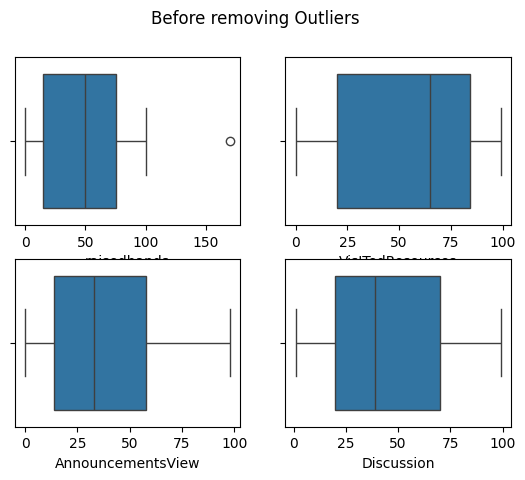

In [8]:
# Outliers can be visualized using boxplot
# using seaborn library we can plot the boxplot
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()


Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                             0
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


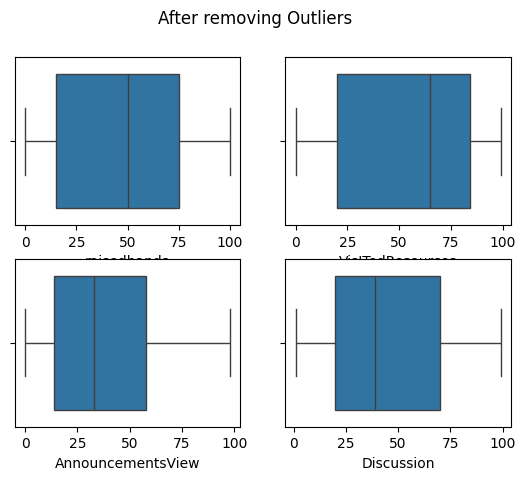

In [9]:
#Display and remove outliers
df = DetectOutlier(df, 'raisedhands')
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()


---------------- Data Skew Values before Yeo John Transformation ----------------------
raisedhands:  0.028374079559687623
VisITedResources:  -0.3388404568312024
AnnouncementsView:  0.4021955128761278
Discussion:  0.3621541732143617
---------------- Data Skew Values after Yeo John Transformation ----------------------
AnnouncementsView:  -0.1800377395845211
Discussion:  -0.13328782723929383


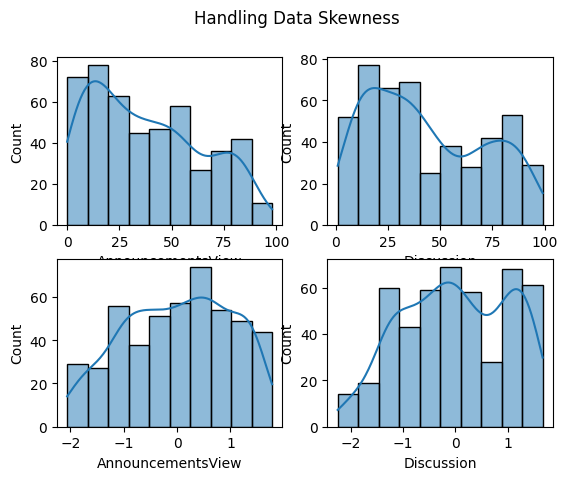

In [12]:
#---------------------------------------------------------------------------------------
print('---------------- Data Skew Values before Yeo John Transformation ----------------------')
# There are two types
# 1. Left skew
# 2. Right skew
# Formula to find out data skewness = 3*(mean-median)/std
# = 0 (no skew) print
# = negative (Negative skew) left skewed data
# = positve (Positive skew) Right skewed data
# = -0.5 to 0 to 0.5 (acceptable skew)
# = -0.5> <-1 moderate negative skew
# = 0.5> <1 moderate positive skew
# = > -1 high negative
# = > 1 high positive
print('raisedhands: ', df['raisedhands'].skew())
print('VisITedResources: ', df['VisITedResources'].skew())
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[0,1], data = df['Discussion'], kde=True)
from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))
print('---------------- Data Skew Values after Yeo John Transformation ----------------------')
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())
sns.histplot(ax = axes[1,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[1,1], data = df['Discussion'], kde=True)
plt.show()
